# Exploring Simple Moving Average(SMA)/ Rolling Mean & Simple Linear Regression (SLR)

*   Import GBP_USD.csv
*   The Rolling mean will be using a 7 day window to take the average spot price values of the last 7 days to make a prediction for the 8th day. 
*  A Simple Linear Regression model will be used to fit the number of days and rolling mean values for the last 7 days in the dataset.
*  Then a comparison will be done between the 
rolling mean and actual price & rolling mean predictions.
*  An exploration of sampling, smoothing (rolling mean), and applying linear regression to data. 



# Importing Libraries

In [1]:
# Libraries
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from matplotlib import rcParams

# Modelling
import sklearn
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Getting Data and Viewing with Pandas

In [2]:
forex_dataset= pd.read_csv('GBP_USD.csv', na_values = "?", comment='\t', skipinitialspace=True)
forex_dataset = forex_dataset.copy()
forex_dataset = forex_dataset.fillna(method='ffill')
forex_dataset = forex_dataset.iloc[::-1,:] # Reverse order of dataset
forex_dataset.reset_index(drop=True, inplace=True) #Reset index
dataset = pd.DataFrame(forex_dataset,columns=['Price','Date'])
dataset.set_index('Date', inplace=True)

## Adding Column

In [3]:
dataset['Ticks'] = range(0,len(dataset.index.values))
dataset.head()

,Price,Ticks
Date,,
"Dec 31, 2019",1.3261,0
"Jan 01, 2020",1.3255,1
"Jan 02, 2020",1.3146,2
"Jan 03, 2020",1.3088,3
"Jan 04, 2020",1.3169,4


## Plotting Ticks vs Spot Price

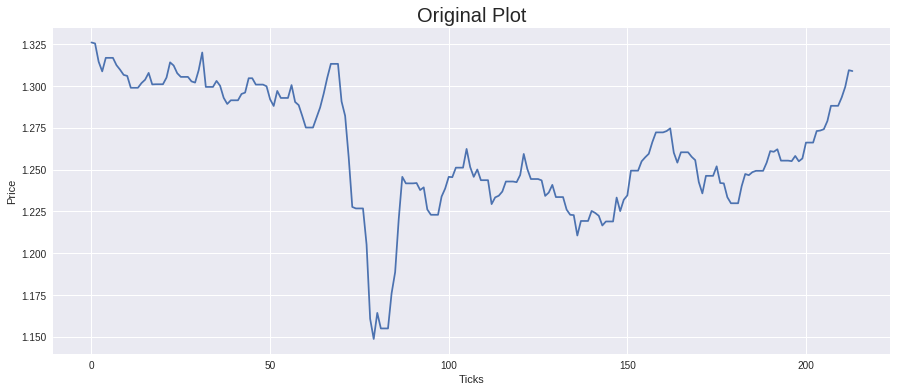

In [4]:
rcParams['figure.figsize'] = 15,6
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot', size = 20)
ax1.plot('Ticks', 'Price', data = dataset);

## Change the Index From Date to Ticks

In [5]:
# Removing Index
dataset = dataset.reset_index()
dataset.head(3)

,Date,Price,Ticks
0,"Dec 31, 2019",1.3261,0
1,"Jan 01, 2020",1.3255,1
2,"Jan 02, 2020",1.3146,2


## Plotting Original Data vs Sampled vs Rolling Mean Plot (Subplot)


*   Take the average of each 7 days previous to predict the next price



In [6]:
# We are going to take the average of the first 7 days of price to predict the 8th day
dataset['Rolling_Mean'] = dataset['Price'].rolling(window = 8).mean().round(4)
dataset.head(8)

,Date,Price,Ticks,Rolling_Mean
0,"Dec 31, 2019",1.3261,0,NaN
1,"Jan 01, 2020",1.3255,1,NaN
2,"Jan 02, 2020",1.3146,2,NaN
3,"Jan 03, 2020",1.3088,3,NaN
4,"Jan 04, 2020",1.3169,4,NaN
5,"Jan 05, 2020",1.3169,5,NaN
6,"Jan 06, 2020",1.3169,6,NaN
7,"Jan 07, 2020",1.3125,7,1.3173


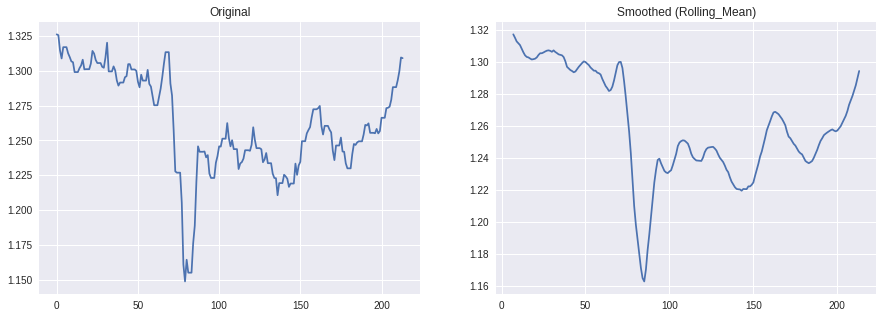

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('Ticks', 'Price', data = dataset);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Rolling_Mean', data = dataset);
axes[1].set_title('Smoothed (Rolling_Mean)');

## Plotting Original Data and Smoothed Data on Same Plot

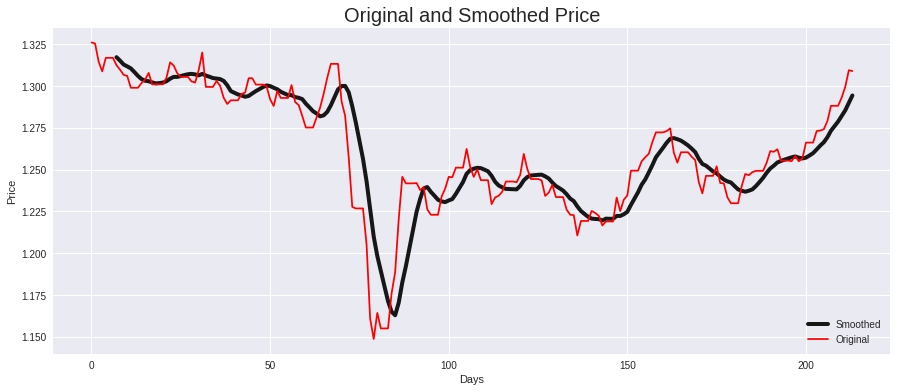

In [8]:
rcParams['figure.figsize'] = 15,6
fig = plt.figure();
plt_one = fig.add_subplot(111);
plt_one.plot(dataset['Ticks'], dataset['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
plt_one.plot(dataset['Ticks'], dataset['Price'], color = (1,0,0), label = 'Original');
plt_one.set_title('Original and Smoothed Price', size = 20)
plt_one.set_xlabel('Days')
plt_one.set_ylabel('Price')
plt.legend(loc='lower right');

## Getting Data Only from the last week

In [9]:
# Looking at data in the last week
# Ticks can be known as days
filter_dataset = dataset[(dataset['Ticks'] >= 207) & (dataset['Ticks'] <= 214)]
filter_dataset.head()

,Date,Price,Ticks,Rolling_Mean
207,"Jul 25, 2020",1.2882,207,1.2733
208,"Jul 26, 2020",1.2882,208,1.2761
209,"Jul 27, 2020",1.2882,209,1.2788
210,"Jul 28, 2020",1.2932,210,1.2822
211,"Jul 29, 2020",1.2996,211,1.2855


## Linear Regression

In [10]:
model = LinearRegression()
# Using the ticks and rolling mean values, make a prediction
# x = ticks, y = target data
model = model.fit(filter_dataset[['Ticks']], filter_dataset[['Rolling_Mean']])
# Make predictions for the last week
predictions = model.predict(filter_dataset[['Ticks']]).round(4)
predictions

array([[1.2724],
       [1.2759],
       [1.2794],
       [1.2829],
       [1.2864],
       [1.2899],
       [1.2934]])

## Joining the Two DataFrames

In [11]:
# Making a DataFrame for the predictions
predictions = pd.DataFrame(data = predictions, index = filter_dataset.index.values, columns = ['Pred'])
# Merge dataframe
joined_dataset = filter_dataset.join(predictions, how = 'inner')
joined_dataset.head()

,Date,Price,Ticks,Rolling_Mean,Pred
207,"Jul 25, 2020",1.2882,207,1.2733,1.2724
208,"Jul 26, 2020",1.2882,208,1.2761,1.2759
209,"Jul 27, 2020",1.2882,209,1.2788,1.2794
210,"Jul 28, 2020",1.2932,210,1.2822,1.2829
211,"Jul 29, 2020",1.2996,211,1.2855,1.2864


# Comparison 

In [12]:
comparison = pd.DataFrame({'Rolling Mean': joined_dataset['Rolling_Mean'], 'Actual': joined_dataset['Price'], 'Predicted Rolling Mean': joined_dataset['Pred']})
comparison = comparison.tail(7)
comparison.sort_index(inplace=True)
comparison

,Actual,Predicted Rolling Mean,Rolling Mean
207,1.2882,1.2724,1.2733
208,1.2882,1.2759,1.2761
209,1.2882,1.2794,1.2788
210,1.2932,1.2829,1.2822
211,1.2996,1.2864,1.2855
212,1.3095,1.2899,1.2900
213,1.3090,1.2934,1.2944


### Performance Metric

In [13]:
def get_performance (compareA, compareB):
  print('Mean Absolute Error:', mean_absolute_error(compareA, compareB).round(4))  
  print('Mean Squared Error:', mean_squared_error(compareA, compareB).round(4))  
  print('R2_Score:',r2_score(compareA, compareB)) 
  print('RMSE', np.sqrt(mean_squared_error(compareA, compareB)))

In [14]:
print('Loss between Rolling Mean & Actual Price')
get_performance(joined_dataset['Rolling_Mean'],joined_dataset['Price'])

print('\nLoss between Rolling Mean Prediction & Actual Price')
get_performance(joined_dataset['Pred'],joined_dataset['Price'])

print('\nLoss between Rolling Mean & Rolling Mean Prediction')
get_performance(joined_dataset['Rolling_Mean'],joined_dataset['Pred'])

Loss between Rolling Mean & Actual Price
('Mean Absolute Error:', 0.0137)
('Mean Squared Error:', 0.0002)
('R2_Score:', -2.969633750579529)
('RMSE', 0.013989792196965842)

Loss between Rolling Mean Prediction & Actual Price
('Mean Absolute Error:', 0.0137)
('Mean Squared Error:', 0.0002)
('R2_Score:', -3.041457725947513)
('RMSE', 0.014072364000814838)

Loss between Rolling Mean & Rolling Mean Prediction
('Mean Absolute Error:', 0.0006)
('Mean Squared Error:', 0.0)
('R2_Score:', 0.9898006490496062)
('RMSE', 0.0007091242083423237)


### Visual Representation

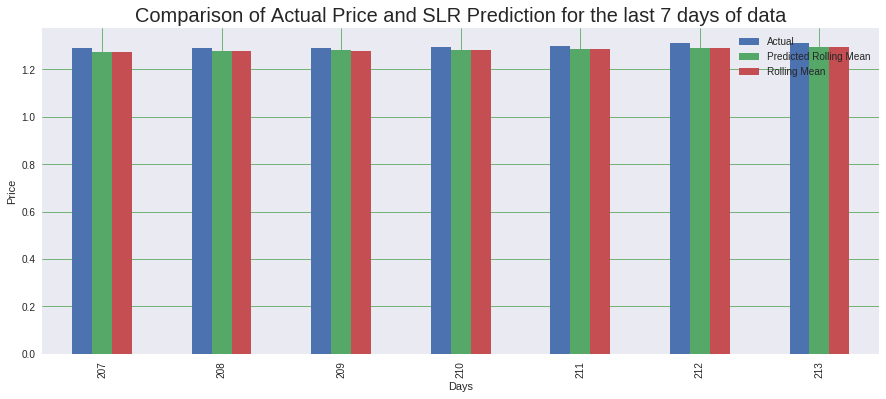

In [15]:
rcParams['figure.figsize'] = 15,6
comparison.plot(kind='bar')
plt.title('Comparison of Actual Price and SLR Prediction for the last 7 days of data', size = 20)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Price')
plt.xlabel('Days')
plt.show()

## Plotting the predicted, rolling mean & actual spot price

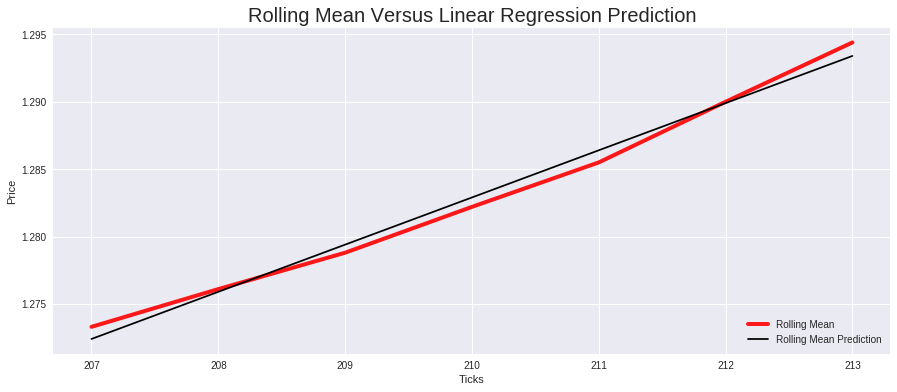

In [16]:
fig = plt.figure();
plt_one = fig.add_subplot(111);
plt_one.plot(joined_dataset['Ticks'], joined_dataset['Rolling_Mean'], color = (1,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
plt_one.plot(joined_dataset['Ticks'], joined_dataset['Pred'], color = (0,0,0), label = 'Rolling Mean Prediction');
plt_one.set_title('Rolling Mean Versus Linear Regression Prediction', size = 20)
plt_one.set_xlabel('Ticks') 
plt_one.set_ylabel('Price')
plt_one.legend(loc='lower right');

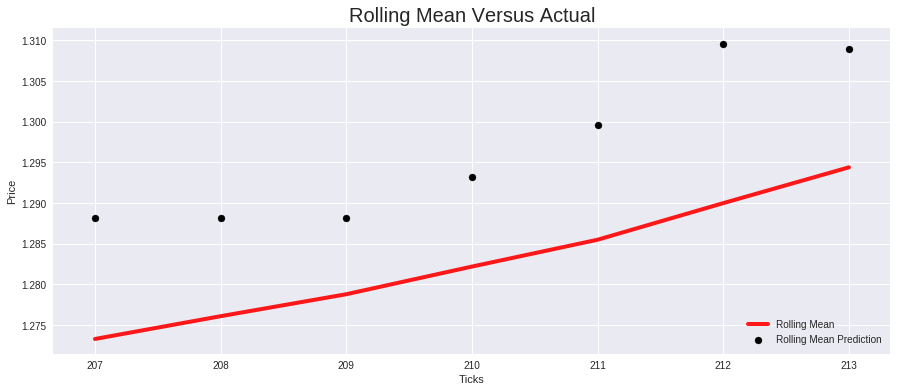

In [17]:
fig = plt.figure();
plt_one = fig.add_subplot(111);
plt_one.plot(joined_dataset['Ticks'], joined_dataset['Rolling_Mean'], color = (1,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
plt_one.scatter(joined_dataset['Ticks'], joined_dataset['Price'], color = (0,0,0), label = 'Rolling Mean Prediction');
plt_one.set_title('Rolling Mean Versus Actual', size = 20)
plt_one.set_xlabel('Ticks') 
plt_one.set_ylabel('Price')
plt_one.legend(loc='lower right');

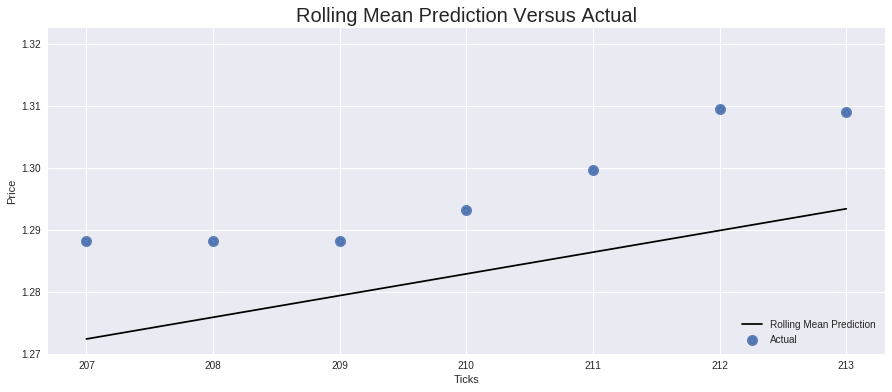

In [18]:
fig = plt.figure();
plt_one = fig.add_subplot(111);
plt_one.scatter(joined_dataset['Ticks'], joined_dataset['Price'], linewidth = 4, alpha = .9, label = 'Actual');
plt_one.plot(joined_dataset['Ticks'], joined_dataset['Pred'], color = (0,0,0), label = 'Rolling Mean Prediction');
plt_one.set_title('Rolling Mean Prediction Versus Actual', size = 20)
plt_one.set_xlabel('Ticks') 
plt_one.set_ylabel('Price')
plt_one.legend(loc='lower right');

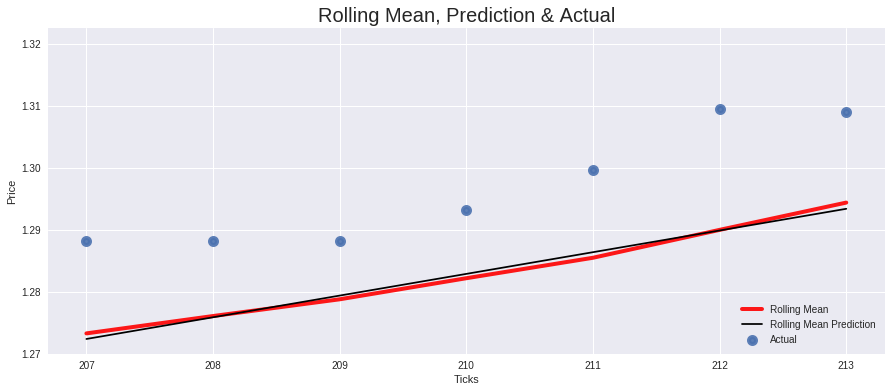

In [19]:
fig = plt.figure();
plt_one = fig.add_subplot(111);
plt_one.scatter(joined_dataset['Ticks'], joined_dataset['Price'], linewidth = 4, alpha = .9, label = 'Actual');
plt_one.plot(joined_dataset['Ticks'], joined_dataset['Rolling_Mean'], color = (1,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
plt_one.plot(joined_dataset['Ticks'], joined_dataset['Pred'], color = (0,0,0), label = 'Rolling Mean Prediction');
plt_one.set_title('Rolling Mean, Prediction & Actual', size = 20)
plt_one.set_xlabel('Ticks') 
plt_one.set_ylabel('Price')
plt_one.legend(loc='lower right');

# Formula Simple Linear Regression

In [20]:
slope = model.coef_[0]
intercept = model.intercept_
# Equation of the line
print("formula: y = {0} + {1}x".format(intercept,slope))


formula: y = [0.5494] + [0.00349286]x
